# Prediction of Breast Tumor
  
  
  

"Breast cancer is the most common cancer diagnosis among women in the United States, accounting for about one third of all cancers diagnosed in women. It is also the second leading cause of cancer deaths among women. This type of cancer occurs when there is abnormal growth of cells in the breast tissue, also known as a tumor.

## Test results
Breast Cancer/ tumor medical test output leads to outcomes
* 1= Malignant (Cancerous) - Present
* 0= Benign (Not Cancerous) -Absent

### Type of Machine Learning 
The outputs are predominantly classified into two categories i.e.., M and B. Hence, this is a Classification problem
        


### Dataset

Kaggle competition : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [2]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , roc_auc_score , roc_curve
from pandas_profiling import ProfileReport
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
#load libraries
import numpy as np         # linear algebra
import pandas as pd        # data processing, CSV file I/O (e.g. pd.read_csv)

# Read the file "data.csv" and print the contents.
#!cat data/data.csv
data = pd.read_csv('data/data.csv', index_col=False,)

#### Load Dataset

First, load the supplied CSV file using additional options in the Pandas read_csv function. 

In [3]:
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [4]:
# Id column is redundant and not useful, we want to drop it
data.drop('id', axis =1, inplace=True)
#data.drop('Unnamed: 0', axis=1, inplace=True)
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [5]:
data.shape

(569, 31)

In [6]:
# Review data types with "info()".
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
#check for missing variables
data.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [8]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

From the results above, diagnosis is a categorical variable, because it represents a fix number of possible values (i.e, Malignant, of Benign. The machine learning algorithms wants numbers, and not strings, as their inputs so we need some method of coding to convert them.



In [9]:
#save the cleaner version of dataframe for future analyis
data.to_csv('data/clean-data.csv')

In [10]:
#ProfileReport(data)


In [11]:
data.head(2)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data)


In [12]:
x = data.drop(columns='diagnosis')
y= data.diagnosis

# Train Test Split

In [13]:
x_train , x_test, y_train,y_test = train_test_split(x,y,random_state = 20)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()
Xs = scaler.fit_transform(x)
ys=pd.DataFrame(Xs)
ys.head()


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# Dimension reduction - PCA

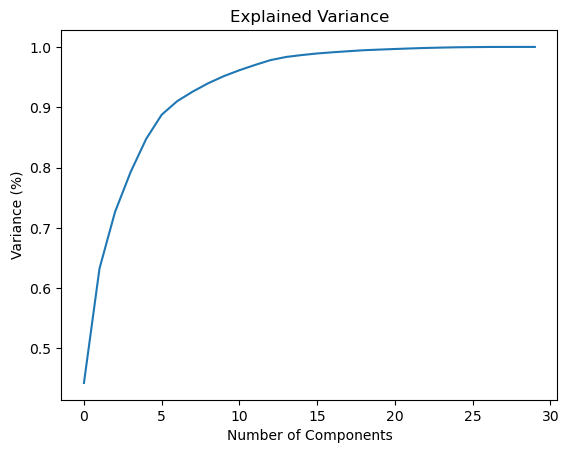

In [15]:
import matplotlib. pyplot as plt
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(Xs)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

## Scree plot to determine the number of PCA 

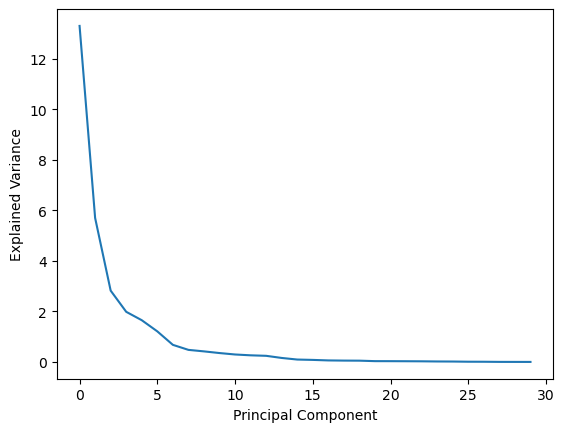

In [16]:
explained_variance = pca.explained_variance_
plt.plot(explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = pd.DataFrame(le.fit_transform(y))
y.head()


,0
0,1
1,1
2,1
3,1
4,1


# SVC classifier

In [18]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(x_train,y_train)

SVC()

In [19]:
svc.score(x_test,y_test)

0.9230769230769231

# Hyper Parameter Tuning

In [20]:
 
param = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear','rbf']}
svm_grid = GridSearchCV(svc , param_grid=param , verbose=3,cv=3)
svm_grid.fit(x_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.944 total time=   0.0s
[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.930 total time=   0.0s
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.951 total time=   0.0s
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.634 total time=   0.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.634 total time=   0.0s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.944 total time=   0.0s
[CV 2/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.930 total time=   0.0s
[CV 3/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.951 total time=   0.0s
[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.634 total time=   0.0s
[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.634 total time=   0.0s
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [21]:
best_params = svm_grid.best_params_
best_params

{'C': 100, 'gamma': 1, 'kernel': 'linear'}

In [22]:
best_svc = SVC(C=100, gamma=1, kernel= 'linear', probability= True)

In [23]:
best_svc.fit(x_train,y_train)

SVC(C=100, gamma=1, kernel='linear', probability=True)

In [24]:
best_svc.score(x_train,y_train)

0.960093896713615

In [25]:
best_svc.score(x_test,y_test)

0.951048951048951

In [26]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
y_pred = best_svc.predict(x_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[83  3]
 [ 4 53]]


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


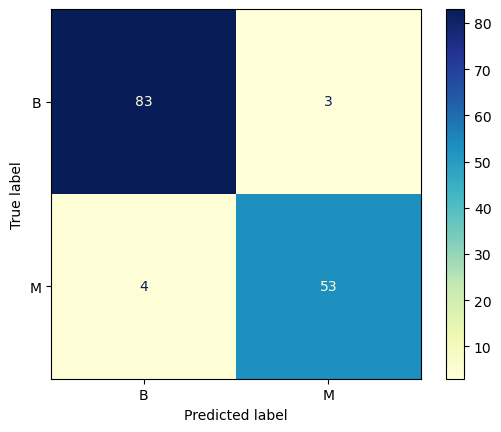

In [27]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(best_svc, x_test, y_test, cmap=plt.cm.YlGnBu)
plt.show()

In [28]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(best_svc, x, y, cv=5)

# Calculate the average training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

# Add the std deviation to the plot
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()

C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
best_svc=SVC(C=100, gamma=1, kernel='linear',probability=True)

# Make predictions on the test data
y_pred_proba = best_svc.predict_proba(x_test)[:,1]
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [29]:
best_svc

SVC(C=100, gamma=1, kernel='linear', probability=True)

In [70]:
from sklearn.metrics import roc_curve, auc
# Plot the receiver operating characteristic curve (ROC).
plt.figure(figsize=(10,8))
probas_ = best_svc.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.axes().set_aspect(1)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Figure size 1000x800 with 0 Axes>

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Create a classifier


# Perform 5-fold cross-validation
scores = cross_val_score(best_svc, x, y, cv=5)

# Print the mean and standard deviation of the scores
print(f'Mean score: {scores.mean():.3f}')
print(f'Standard deviation: {scores.std():.3f}')

C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

KeyboardInterrupt: 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a boxplot of the scores
sns.boxplot(data=scores)
plt.xlabel('Cross-validation fold')
plt.ylabel('Score')
plt.show()

 # Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



# Create the model
model = LogisticRegression()

# Train the model on the training data
model.fit(x_train, y_train)

# Test the model on the test data
accuracy = model.score(x_test, y_test)

# Print the accuracy
print(accuracy)



0.9370629370629371


C:\Users\surya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [33]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [35]:
grid_search.fit(x_train, y_train)


C:\Users\surya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\surya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\surya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\surya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
T

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']})

In [36]:
print(grid_search.best_params_)
accuracy = grid_search.score(x_test, y_test)
print(accuracy)

{'C': 100, 'penalty': 'l2'}
0.9440559440559441


# LDA

In [37]:
# Import the necessary libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split


# Create the model
model = LinearDiscriminantAnalysis()

# Train the model on the training data
model.fit(x_train, y_train)

# Test the model on the test data
accuracy = model.score(x_test, y_test)

# Print the accuracy
print(accuracy)


0.958041958041958


In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto']
}

# Create the model
model = LinearDiscriminantAnalysis()

# Create the grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'shrinkage': 'auto', 'solver': 'lsqr'}


C:\Users\surya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\surya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\surya\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 583, in fit
    raise NotImplementedError("shrinkage not supported")
NotImplementedError: shrinkage not supported

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\Users\surya\anaconda3\lib\site-packages\skl

In [39]:
# Print the accuracy of the model with the best hyperparameters
accuracy = grid_search.score(x_test, y_test)
print(accuracy)

0.958041958041958


# KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



# Create the model
model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
model.fit(x_train, y_train)

# Test the model on the test data
accuracy = model.score(x_test, y_test)

# Print the accuracy
print(accuracy)

0.9300699300699301


C:\Users\surya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# Create the model
model = KNeighborsClassifier()

# Create the grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)
Th

C:\Users\surya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

{'n_neighbors': 9, 'weights': 'uniform'}


C:\Users\surya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

NameError: name 'Th' is not defined

In [42]:
# Print the accuracy of the model with the best hyperparameters
accuracy1 = grid_search.score(x_test, y_test)
print(accuracy1)


0.9300699300699301


C:\Users\surya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Decision Tree

In [43]:
# Import the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# Create the model
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(x_train, y_train)

# Test the model on the test data
accuracy2 = model.score(x_test, y_test)

# Print the accuracy
print(accuracy2)


0.8881118881118881


In [94]:
# Import the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Create the model
model = DecisionTreeClassifier()

# Create the grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)


{'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 2}


In [44]:
# Print the accuracy of the model with the best hyperparameters
accuracy3 = grid_search.score(x_test, y_test)
print(accuracy3)


0.9300699300699301


C:\Users\surya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# NB

In [45]:
# Import the necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split



# Create the model
model = GaussianNB()

# Train the model on the training data
model.fit(x_train, y_train)

# Test the model on the test data
accuracy4 = model.score(x_test, y_test)

# Print the accuracy
print(accuracy4)


0.951048951048951


In [46]:
# Import the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Create the model
model = DecisionTreeClassifier()

# Create the grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}


In [48]:
# Print the accuracy of the model with the best hyperparameters
accuracy6 = grid_search.score(x_test, y_test)
print(accuracy6)


0.951048951048951


Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.947 total time=   0.0s
[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.934 total time=   0.0s
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.940 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.629 total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.947 total time=   0.0s
[CV 2/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.934 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 3/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.940 total time=   0.0s
[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.629 total time=   0.0s
[CV 1/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.947 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 2/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.934 total time=   0.0s
[CV 3/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.940 total time=   0.0s
[CV 1/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.629 total time=   0.0s
[CV 1/3] END .C=0.1, gamma=0.001, kernel=linear;, score=0.947 total time=   0.0s
[CV 2/3] END .C=0.1, gamma=0.001, kernel=linear;, score=0.934 total time=   0.0s
[CV 3/3] END .C=0.1, gamma=0.001, kernel=linear;, score=0.940 total time=   0.0s
[CV 1/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END .......C=1, gamma=1, kernel=linear;, score=0.941 total time=   0.7s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .......C=1, gamma=1, kernel=linear;, score=0.934 total time=   2.1s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .......C=1, gamma=1, kernel=linear;, score=0.927 total time=   0.4s
[CV 1/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END .....C=1, gamma=0.1, kernel=linear;, score=0.941 total time=   0.7s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .....C=1, gamma=0.1, kernel=linear;, score=0.934 total time=   2.1s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .....C=1, gamma=0.1, kernel=linear;, score=0.927 total time=   0.5s
[CV 1/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ....C=1, gamma=0.01, kernel=linear;, score=0.941 total time=   0.7s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ....C=1, gamma=0.01, kernel=linear;, score=0.934 total time=   1.9s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ....C=1, gamma=0.01, kernel=linear;, score=0.927 total time=   0.3s
[CV 1/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.623 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ...C=1, gamma=0.001, kernel=linear;, score=0.941 total time=   0.5s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ...C=1, gamma=0.001, kernel=linear;, score=0.934 total time=   1.6s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...C=1, gamma=0.001, kernel=linear;, score=0.927 total time=   0.3s
[CV 1/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.934 total time=   0.0s
[CV 2/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.914 total time=   0.0s
[CV 3/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.894 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ......C=10, gamma=1, kernel=linear;, score=0.954 total time=   0.9s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ......C=10, gamma=1, kernel=linear;, score=0.954 total time=   0.6s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ......C=10, gamma=1, kernel=linear;, score=0.940 total time=   2.9s
[CV 1/3] END .........C=10, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END .........C=10, gamma=1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END .........C=10, gamma=1, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ....C=10, gamma=0.1, kernel=linear;, score=0.954 total time=   0.9s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ....C=10, gamma=0.1, kernel=linear;, score=0.954 total time=   0.5s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ....C=10, gamma=0.1, kernel=linear;, score=0.940 total time=   2.9s
[CV 1/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ...C=10, gamma=0.01, kernel=linear;, score=0.954 total time=   1.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ...C=10, gamma=0.01, kernel=linear;, score=0.954 total time=   0.6s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...C=10, gamma=0.01, kernel=linear;, score=0.940 total time=   2.9s
[CV 1/3] END ......C=10, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ......C=10, gamma=0.01, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END ......C=10, gamma=0.01, kernel=rbf;, score=0.623 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ..C=10, gamma=0.001, kernel=linear;, score=0.954 total time=   0.9s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ..C=10, gamma=0.001, kernel=linear;, score=0.954 total time=   0.6s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ..C=10, gamma=0.001, kernel=linear;, score=0.940 total time=   2.8s
[CV 1/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.928 total time=   0.0s
[CV 2/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.895 total time=   0.0s
[CV 3/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.874 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END .....C=100, gamma=1, kernel=linear;, score=0.954 total time=   1.2s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .....C=100, gamma=1, kernel=linear;, score=0.961 total time=   1.2s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .....C=100, gamma=1, kernel=linear;, score=0.954 total time=   1.2s
[CV 1/3] END ........C=100, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ........C=100, gamma=1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END ........C=100, gamma=1, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ...C=100, gamma=0.1, kernel=linear;, score=0.954 total time=   1.1s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ...C=100, gamma=0.1, kernel=linear;, score=0.961 total time=   1.3s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...C=100, gamma=0.1, kernel=linear;, score=0.954 total time=   1.4s
[CV 1/3] END ......C=100, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ......C=100, gamma=0.1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END ......C=100, gamma=0.1, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ..C=100, gamma=0.01, kernel=linear;, score=0.954 total time=   1.2s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ..C=100, gamma=0.01, kernel=linear;, score=0.961 total time=   1.2s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ..C=100, gamma=0.01, kernel=linear;, score=0.954 total time=   1.2s
[CV 1/3] END .....C=100, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END .....C=100, gamma=0.01, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END .....C=100, gamma=0.01, kernel=rbf;, score=0.623 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END .C=100, gamma=0.001, kernel=linear;, score=0.954 total time=   1.3s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .C=100, gamma=0.001, kernel=linear;, score=0.961 total time=   1.3s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .C=100, gamma=0.001, kernel=linear;, score=0.954 total time=   1.2s
[CV 1/3] END ....C=100, gamma=0.001, kernel=rbf;, score=0.928 total time=   0.0s
[CV 2/3] END ....C=100, gamma=0.001, kernel=rbf;, score=0.895 total time=   0.0s
[CV 3/3] END ....C=100, gamma=0.001, kernel=rbf;, score=0.874 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.928 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.947 total time=   0.1s
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.901 total time=   0.0s
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.629 total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.928 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 2/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.947 total time=   0.1s
[CV 3/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.901 total time=   0.0s
[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.629 total time=   0.0s
[CV 1/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.928 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 2/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.947 total time=   0.1s
[CV 3/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.901 total time=   0.0s
[CV 1/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.629 total time=   0.0s
[CV 1/3] END .C=0.1, gamma=0.001, kernel=linear;, score=0.928 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 2/3] END .C=0.1, gamma=0.001, kernel=linear;, score=0.947 total time=   0.1s
[CV 3/3] END .C=0.1, gamma=0.001, kernel=linear;, score=0.901 total time=   0.0s
[CV 1/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END .......C=1, gamma=1, kernel=linear;, score=0.934 total time=   0.5s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .......C=1, gamma=1, kernel=linear;, score=0.947 total time=   0.6s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .......C=1, gamma=1, kernel=linear;, score=0.927 total time=   0.5s
[CV 1/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END .....C=1, gamma=0.1, kernel=linear;, score=0.934 total time=   0.7s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .....C=1, gamma=0.1, kernel=linear;, score=0.947 total time=   0.6s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .....C=1, gamma=0.1, kernel=linear;, score=0.927 total time=   0.5s
[CV 1/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ....C=1, gamma=0.01, kernel=linear;, score=0.934 total time=   0.5s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ....C=1, gamma=0.01, kernel=linear;, score=0.947 total time=   0.5s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ....C=1, gamma=0.01, kernel=linear;, score=0.927 total time=   0.4s
[CV 1/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.623 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ...C=1, gamma=0.001, kernel=linear;, score=0.934 total time=   0.5s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ...C=1, gamma=0.001, kernel=linear;, score=0.947 total time=   0.5s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...C=1, gamma=0.001, kernel=linear;, score=0.927 total time=   0.4s
[CV 1/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.921 total time=   0.0s
[CV 2/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.928 total time=   0.0s
[CV 3/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.894 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ......C=10, gamma=1, kernel=linear;, score=0.947 total time=   0.9s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ......C=10, gamma=1, kernel=linear;, score=0.967 total time=   0.7s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ......C=10, gamma=1, kernel=linear;, score=0.921 total time=   2.2s
[CV 1/3] END .........C=10, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END .........C=10, gamma=1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END .........C=10, gamma=1, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ....C=10, gamma=0.1, kernel=linear;, score=0.947 total time=   0.9s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ....C=10, gamma=0.1, kernel=linear;, score=0.967 total time=   0.7s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ....C=10, gamma=0.1, kernel=linear;, score=0.921 total time=   2.3s
[CV 1/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ...C=10, gamma=0.01, kernel=linear;, score=0.947 total time=   1.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ...C=10, gamma=0.01, kernel=linear;, score=0.967 total time=   0.8s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...C=10, gamma=0.01, kernel=linear;, score=0.921 total time=   2.3s
[CV 1/3] END ......C=10, gamma=0.01, kernel=rbf;, score=0.632 total time=   0.0s
[CV 2/3] END ......C=10, gamma=0.01, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END ......C=10, gamma=0.01, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ..C=10, gamma=0.001, kernel=linear;, score=0.947 total time=   0.9s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ..C=10, gamma=0.001, kernel=linear;, score=0.967 total time=   0.7s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ..C=10, gamma=0.001, kernel=linear;, score=0.921 total time=   2.6s
[CV 1/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.908 total time=   0.0s
[CV 2/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.961 total time=   0.0s
[CV 3/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.874 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END .....C=100, gamma=1, kernel=linear;, score=0.947 total time=   1.2s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .....C=100, gamma=1, kernel=linear;, score=0.967 total time=   2.2s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .....C=100, gamma=1, kernel=linear;, score=0.901 total time=   1.8s
[CV 1/3] END ........C=100, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ........C=100, gamma=1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END ........C=100, gamma=1, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ...C=100, gamma=0.1, kernel=linear;, score=0.947 total time=   1.1s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ...C=100, gamma=0.1, kernel=linear;, score=0.967 total time=   2.1s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...C=100, gamma=0.1, kernel=linear;, score=0.901 total time=   1.7s
[CV 1/3] END ......C=100, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ......C=100, gamma=0.1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END ......C=100, gamma=0.1, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ..C=100, gamma=0.01, kernel=linear;, score=0.947 total time=   1.1s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ..C=100, gamma=0.01, kernel=linear;, score=0.967 total time=   2.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ..C=100, gamma=0.01, kernel=linear;, score=0.901 total time=   1.6s
[CV 1/3] END .....C=100, gamma=0.01, kernel=rbf;, score=0.632 total time=   0.0s
[CV 2/3] END .....C=100, gamma=0.01, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END .....C=100, gamma=0.01, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END .C=100, gamma=0.001, kernel=linear;, score=0.947 total time=   1.1s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .C=100, gamma=0.001, kernel=linear;, score=0.967 total time=   2.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .C=100, gamma=0.001, kernel=linear;, score=0.901 total time=   1.6s
[CV 1/3] END ....C=100, gamma=0.001, kernel=rbf;, score=0.908 total time=   0.0s
[CV 2/3] END ....C=100, gamma=0.001, kernel=rbf;, score=0.961 total time=   0.0s
[CV 3/3] END ....C=100, gamma=0.001, kernel=rbf;, score=0.874 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.928 total time=   0.0s
[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.928 total time=   0.0s
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.927 total time=   0.0s
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.928 total time=   0.0s
[CV 2/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.928 total time=   0.0s
[CV 3/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.927 total time=   0.0s
[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.629 total time=   0.0s
[CV 1/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.928 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 2/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.928 total time=   0.0s
[CV 3/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.927 total time=   0.0s
[CV 1/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.629 total time=   0.0s
[CV 1/3] END .C=0.1, gamma=0.001, kernel=linear;, score=0.928 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 2/3] END .C=0.1, gamma=0.001, kernel=linear;, score=0.928 total time=   0.0s
[CV 3/3] END .C=0.1, gamma=0.001, kernel=linear;, score=0.927 total time=   0.0s
[CV 1/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END .......C=1, gamma=1, kernel=linear;, score=0.941 total time=   0.7s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .......C=1, gamma=1, kernel=linear;, score=0.941 total time=   0.6s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .......C=1, gamma=1, kernel=linear;, score=0.940 total time=   0.2s
[CV 1/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END .....C=1, gamma=0.1, kernel=linear;, score=0.941 total time=   0.7s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .....C=1, gamma=0.1, kernel=linear;, score=0.941 total time=   0.5s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .....C=1, gamma=0.1, kernel=linear;, score=0.940 total time=   0.2s
[CV 1/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ....C=1, gamma=0.01, kernel=linear;, score=0.941 total time=   0.7s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ....C=1, gamma=0.01, kernel=linear;, score=0.941 total time=   0.5s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ....C=1, gamma=0.01, kernel=linear;, score=0.940 total time=   0.2s
[CV 1/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.623 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ...C=1, gamma=0.001, kernel=linear;, score=0.941 total time=   0.7s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ...C=1, gamma=0.001, kernel=linear;, score=0.941 total time=   0.6s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...C=1, gamma=0.001, kernel=linear;, score=0.940 total time=   0.2s
[CV 1/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.914 total time=   0.0s
[CV 2/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.934 total time=   0.0s
[CV 3/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.894 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ......C=10, gamma=1, kernel=linear;, score=0.934 total time=   3.6s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ......C=10, gamma=1, kernel=linear;, score=0.928 total time=   0.9s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ......C=10, gamma=1, kernel=linear;, score=0.940 total time=   1.1s
[CV 1/3] END .........C=10, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END .........C=10, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END .........C=10, gamma=1, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ....C=10, gamma=0.1, kernel=linear;, score=0.934 total time=   3.5s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ....C=10, gamma=0.1, kernel=linear;, score=0.928 total time=   1.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ....C=10, gamma=0.1, kernel=linear;, score=0.940 total time=   1.1s
[CV 1/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ...C=10, gamma=0.01, kernel=linear;, score=0.934 total time=   3.4s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ...C=10, gamma=0.01, kernel=linear;, score=0.928 total time=   0.9s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...C=10, gamma=0.01, kernel=linear;, score=0.940 total time=   1.1s
[CV 1/3] END ......C=10, gamma=0.01, kernel=rbf;, score=0.638 total time=   0.0s
[CV 2/3] END ......C=10, gamma=0.01, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END ......C=10, gamma=0.01, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ..C=10, gamma=0.001, kernel=linear;, score=0.934 total time=   3.4s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ..C=10, gamma=0.001, kernel=linear;, score=0.928 total time=   1.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ..C=10, gamma=0.001, kernel=linear;, score=0.940 total time=   1.1s
[CV 1/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.914 total time=   0.0s
[CV 2/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.934 total time=   0.0s
[CV 3/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.868 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END .....C=100, gamma=1, kernel=linear;, score=0.934 total time=   4.7s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .....C=100, gamma=1, kernel=linear;, score=0.921 total time=   5.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .....C=100, gamma=1, kernel=linear;, score=0.934 total time=   3.9s
[CV 1/3] END ........C=100, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ........C=100, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END ........C=100, gamma=1, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ...C=100, gamma=0.1, kernel=linear;, score=0.934 total time=   4.6s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ...C=100, gamma=0.1, kernel=linear;, score=0.921 total time=   5.1s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...C=100, gamma=0.1, kernel=linear;, score=0.934 total time=   3.7s
[CV 1/3] END ......C=100, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ......C=100, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END ......C=100, gamma=0.1, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ..C=100, gamma=0.01, kernel=linear;, score=0.934 total time=   4.5s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ..C=100, gamma=0.01, kernel=linear;, score=0.921 total time=   5.9s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ..C=100, gamma=0.01, kernel=linear;, score=0.934 total time=   4.1s
[CV 1/3] END .....C=100, gamma=0.01, kernel=rbf;, score=0.638 total time=   0.0s
[CV 2/3] END .....C=100, gamma=0.01, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END .....C=100, gamma=0.01, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END .C=100, gamma=0.001, kernel=linear;, score=0.934 total time=   4.6s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .C=100, gamma=0.001, kernel=linear;, score=0.921 total time=   5.1s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .C=100, gamma=0.001, kernel=linear;, score=0.934 total time=   4.1s
[CV 1/3] END ....C=100, gamma=0.001, kernel=rbf;, score=0.914 total time=   0.0s
[CV 2/3] END ....C=100, gamma=0.001, kernel=rbf;, score=0.934 total time=   0.0s
[CV 3/3] END ....C=100, gamma=0.001, kernel=rbf;, score=0.868 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.941 total time=   0.0s
[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.954 total time=   0.0s
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.967 total time=   0.0s
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.941 total time=   0.0s
[CV 2/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.954 total time=   0.0s
[CV 3/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.967 total time=   0.0s
[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.629 total time=   0.0s
[CV 1/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.941 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 2/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.954 total time=   0.0s
[CV 3/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.967 total time=   0.0s
[CV 1/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.629 total time=   0.0s
[CV 1/3] END .C=0.1, gamma=0.001, kernel=linear;, score=0.941 total time=   0.0s
[CV 2/3] END .C=0.1, gamma=0.001, kernel=linear;, score=0.954 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 3/3] END .C=0.1, gamma=0.001, kernel=linear;, score=0.967 total time=   0.0s
[CV 1/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END .......C=1, gamma=1, kernel=linear;, score=0.941 total time=   0.1s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .......C=1, gamma=1, kernel=linear;, score=0.947 total time=   0.7s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .......C=1, gamma=1, kernel=linear;, score=0.967 total time=   0.2s
[CV 1/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END .....C=1, gamma=0.1, kernel=linear;, score=0.941 total time=   0.1s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .....C=1, gamma=0.1, kernel=linear;, score=0.947 total time=   0.7s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .....C=1, gamma=0.1, kernel=linear;, score=0.967 total time=   0.3s
[CV 1/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ....C=1, gamma=0.01, kernel=linear;, score=0.941 total time=   0.1s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ....C=1, gamma=0.01, kernel=linear;, score=0.947 total time=   0.7s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ....C=1, gamma=0.01, kernel=linear;, score=0.967 total time=   0.3s
[CV 1/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ...C=1, gamma=0.001, kernel=linear;, score=0.941 total time=   0.1s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ...C=1, gamma=0.001, kernel=linear;, score=0.947 total time=   0.7s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...C=1, gamma=0.001, kernel=linear;, score=0.967 total time=   0.3s
[CV 1/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.941 total time=   0.0s
[CV 2/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.934 total time=   0.0s
[CV 3/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.887 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ......C=10, gamma=1, kernel=linear;, score=0.954 total time=   0.7s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ......C=10, gamma=1, kernel=linear;, score=0.947 total time=   3.2s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ......C=10, gamma=1, kernel=linear;, score=0.974 total time=   0.6s
[CV 1/3] END .........C=10, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END .........C=10, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END .........C=10, gamma=1, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ....C=10, gamma=0.1, kernel=linear;, score=0.954 total time=   0.7s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ....C=10, gamma=0.1, kernel=linear;, score=0.947 total time=   3.1s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ....C=10, gamma=0.1, kernel=linear;, score=0.974 total time=   0.5s
[CV 1/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ...C=10, gamma=0.01, kernel=linear;, score=0.954 total time=   0.7s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ...C=10, gamma=0.01, kernel=linear;, score=0.947 total time=   3.1s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...C=10, gamma=0.01, kernel=linear;, score=0.974 total time=   0.5s
[CV 1/3] END ......C=10, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ......C=10, gamma=0.01, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END ......C=10, gamma=0.01, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ..C=10, gamma=0.001, kernel=linear;, score=0.954 total time=   0.7s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ..C=10, gamma=0.001, kernel=linear;, score=0.947 total time=   3.2s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ..C=10, gamma=0.001, kernel=linear;, score=0.974 total time=   0.6s
[CV 1/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.895 total time=   0.0s
[CV 2/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.928 total time=   0.0s
[CV 3/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.881 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END .....C=100, gamma=1, kernel=linear;, score=0.967 total time=   2.3s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .....C=100, gamma=1, kernel=linear;, score=0.934 total time=   3.4s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .....C=100, gamma=1, kernel=linear;, score=0.974 total time=   0.9s
[CV 1/3] END ........C=100, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ........C=100, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END ........C=100, gamma=1, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ...C=100, gamma=0.1, kernel=linear;, score=0.967 total time=   2.3s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ...C=100, gamma=0.1, kernel=linear;, score=0.934 total time=   3.3s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...C=100, gamma=0.1, kernel=linear;, score=0.974 total time=   0.9s
[CV 1/3] END ......C=100, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ......C=100, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END ......C=100, gamma=0.1, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ..C=100, gamma=0.01, kernel=linear;, score=0.967 total time=   2.4s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ..C=100, gamma=0.01, kernel=linear;, score=0.934 total time=   3.3s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ..C=100, gamma=0.01, kernel=linear;, score=0.974 total time=   0.9s
[CV 1/3] END .....C=100, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END .....C=100, gamma=0.01, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END .....C=100, gamma=0.01, kernel=rbf;, score=0.629 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END .C=100, gamma=0.001, kernel=linear;, score=0.967 total time=   2.4s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .C=100, gamma=0.001, kernel=linear;, score=0.934 total time=   3.4s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .C=100, gamma=0.001, kernel=linear;, score=0.974 total time=   0.9s
[CV 1/3] END ....C=100, gamma=0.001, kernel=rbf;, score=0.895 total time=   0.0s
[CV 2/3] END ....C=100, gamma=0.001, kernel=rbf;, score=0.928 total time=   0.0s
[CV 3/3] END ....C=100, gamma=0.001, kernel=rbf;, score=0.881 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.941 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.941 total time=   0.2s
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.928 total time=   0.0s
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.941 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 2/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.941 total time=   0.2s
[CV 3/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.928 total time=   0.0s
[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 1/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.941 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 2/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.941 total time=   0.3s
[CV 3/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.928 total time=   0.0s
[CV 1/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.632 total time=   0.0s
[CV 1/3] END .C=0.1, gamma=0.001, kernel=linear;, score=0.941 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 2/3] END .C=0.1, gamma=0.001, kernel=linear;, score=0.941 total time=   0.2s
[CV 3/3] END .C=0.1, gamma=0.001, kernel=linear;, score=0.928 total time=   0.0s
[CV 1/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.632 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END .......C=1, gamma=1, kernel=linear;, score=0.941 total time=   0.3s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .......C=1, gamma=1, kernel=linear;, score=0.934 total time=   0.6s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .......C=1, gamma=1, kernel=linear;, score=0.934 total time=   0.3s
[CV 1/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.632 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END .....C=1, gamma=0.1, kernel=linear;, score=0.941 total time=   0.3s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .....C=1, gamma=0.1, kernel=linear;, score=0.934 total time=   0.6s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .....C=1, gamma=0.1, kernel=linear;, score=0.934 total time=   0.3s
[CV 1/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.632 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ....C=1, gamma=0.01, kernel=linear;, score=0.941 total time=   0.4s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ....C=1, gamma=0.01, kernel=linear;, score=0.934 total time=   0.6s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ....C=1, gamma=0.01, kernel=linear;, score=0.934 total time=   0.3s
[CV 1/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.632 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ...C=1, gamma=0.001, kernel=linear;, score=0.941 total time=   0.3s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ...C=1, gamma=0.001, kernel=linear;, score=0.934 total time=   0.6s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...C=1, gamma=0.001, kernel=linear;, score=0.934 total time=   0.3s
[CV 1/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.921 total time=   0.0s
[CV 2/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.895 total time=   0.0s
[CV 3/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.928 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ......C=10, gamma=1, kernel=linear;, score=0.954 total time=   3.6s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ......C=10, gamma=1, kernel=linear;, score=0.941 total time=   2.6s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ......C=10, gamma=1, kernel=linear;, score=0.954 total time=   0.6s
[CV 1/3] END .........C=10, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END .........C=10, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END .........C=10, gamma=1, kernel=rbf;, score=0.632 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ....C=10, gamma=0.1, kernel=linear;, score=0.954 total time=   3.7s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ....C=10, gamma=0.1, kernel=linear;, score=0.941 total time=   2.5s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ....C=10, gamma=0.1, kernel=linear;, score=0.954 total time=   0.6s
[CV 1/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.632 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ...C=10, gamma=0.01, kernel=linear;, score=0.954 total time=   3.5s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ...C=10, gamma=0.01, kernel=linear;, score=0.941 total time=   2.5s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...C=10, gamma=0.01, kernel=linear;, score=0.954 total time=   0.5s
[CV 1/3] END ......C=10, gamma=0.01, kernel=rbf;, score=0.638 total time=   0.0s
[CV 2/3] END ......C=10, gamma=0.01, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END ......C=10, gamma=0.01, kernel=rbf;, score=0.638 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ..C=10, gamma=0.001, kernel=linear;, score=0.954 total time=   3.5s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ..C=10, gamma=0.001, kernel=linear;, score=0.941 total time=   2.5s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ..C=10, gamma=0.001, kernel=linear;, score=0.954 total time=   0.5s
[CV 1/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.921 total time=   0.0s
[CV 2/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.901 total time=   0.0s
[CV 3/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.914 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END .....C=100, gamma=1, kernel=linear;, score=0.928 total time=  12.7s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .....C=100, gamma=1, kernel=linear;, score=0.921 total time=   1.6s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .....C=100, gamma=1, kernel=linear;, score=0.961 total time=   0.9s
[CV 1/3] END ........C=100, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ........C=100, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END ........C=100, gamma=1, kernel=rbf;, score=0.632 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ...C=100, gamma=0.1, kernel=linear;, score=0.928 total time=  14.2s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ...C=100, gamma=0.1, kernel=linear;, score=0.921 total time=   1.8s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...C=100, gamma=0.1, kernel=linear;, score=0.961 total time=   0.9s
[CV 1/3] END ......C=100, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/3] END ......C=100, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/3] END ......C=100, gamma=0.1, kernel=rbf;, score=0.632 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END ..C=100, gamma=0.01, kernel=linear;, score=0.928 total time=  13.1s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ..C=100, gamma=0.01, kernel=linear;, score=0.921 total time=   1.6s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ..C=100, gamma=0.01, kernel=linear;, score=0.961 total time=   0.9s
[CV 1/3] END .....C=100, gamma=0.01, kernel=rbf;, score=0.638 total time=   0.0s
[CV 2/3] END .....C=100, gamma=0.01, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END .....C=100, gamma=0.01, kernel=rbf;, score=0.638 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/3] END .C=100, gamma=0.001, kernel=linear;, score=0.928 total time=  13.2s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .C=100, gamma=0.001, kernel=linear;, score=0.921 total time=   2.9s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .C=100, gamma=0.001, kernel=linear;, score=0.961 total time=   1.1s
[CV 1/3] END ....C=100, gamma=0.001, kernel=rbf;, score=0.921 total time=   0.0s
[CV 2/3] END ....C=100, gamma=0.001, kernel=rbf;, score=0.901 total time=   0.0s
[CV 3/3] END ....C=100, gamma=0.001, kernel=rbf;, score=0.914 total time=   0.0s


C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

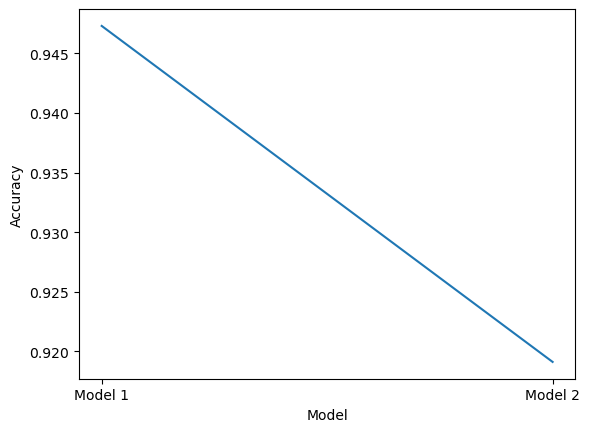

In [49]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Define the models and their names
models = [svm_grid, model]
names = ['Model 1', 'Model 2']

# Define the number of folds for cross-validation
n_folds = 5

# Initialize a list to store the mean accuracies
mean_accuracies = []

# Loop through the models
for model in models:
    # Perform cross-validation
    accuracies = cross_val_score(model, x, y, cv=n_folds)
    
    # Store the mean accuracy
    mean_accuracies.append(accuracies.mean())

# Plot the mean accuracies
plt.plot(names, mean_accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()
